Deep **Learnig**

In [1]:
#Importações
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

**Carregando os Dados**

In [6]:
#Carrega o dataset CIFAR-10
(imagens_treino, labels_treino), (imagens_teste, labels_teste) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [7]:
# Classes das imagens
nomes_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## Pré-Processamento e Visualização das Imagens

In [8]:
#Normaliza os valores dos pixels para qie os dados fiquem na mesma escala
imagens_treino = imagens_treino / 255.0
imagens_teste = imagens_teste / 255.0

In [9]:
# Função para exibir as imagens
def visualiza_imagens(images, labels):
  plt.figure(figsize = (10, 10))
  for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap = plt.cm.binary)
    plt.xlabel(nomes_classes[labels[i][0]])
  plt.show()

In [ ]:
# Exceuta a função
visualiza_imagens(imagens_treino, labels_treino)

### Construção do Modelo

In [11]:
# Modelo

#cria o onjeto de sequência de camadas
modelo = models.Sequential()

#Adiciona o primeiro bloco de convolyção e max pooling (Camada de entrada)
modelo.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
modelo.add(layers.MaxPool2D((2, 2)))

# Adicona o segundo plobo de  convolução e max polling (camada intermediária)
modelo.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo.add(layers.MaxPool2D((2, 2)))

# Adiciona o terceiro bloco de convolução e max pooling (camada )
modelo.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo.add(layers.MaxPool2D((2, 2)))

In [12]:
#Adicionar camadas de classificação
modelo.add(layers.Flatten())
modelo.add(layers.Dense(64, activation = 'relu'))
modelo.add(layers.Dense(10, activation = 'softmax'))

In [13]:
#sumario do modelo
modelo.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 64)         

In [16]:
# Compilação do modelo
modelo.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])

In [17]:
%%time
history = modelo.fit(imagens_treino,
                     labels_treino,
                     epochs = 10,
                     validation_data = (imagens_teste, labels_teste))

Epoch 1/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.5672 - accuracy: 0.4261 - val_loss: 1.3595 - val_accuracy: 0.5173
Epoch 2/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.2052 - accuracy: 0.5725 - val_loss: 1.1007 - val_accuracy: 0.6045
Epoch 3/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.0523 - accuracy: 0.6315 - val_loss: 1.0147 - val_accuracy: 0.6466
Epoch 4/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.9502 - accuracy: 0.6667 - val_loss: 0.9410 - val_accuracy: 0.6700
Epoch 5/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.8719 - accuracy: 0.6952 - val_loss: 0.9023 - val_accuracy: 0.6849
Epoch 6/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8171 - accuracy: 0.7159 - val_loss: 0.9106 - val_accuracy: 0.6888
Epoch 7/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.7704 - accuracy: 0.7305 - val_loss: 0.9312 -

### Avaliação do Modelo

In [18]:
# Avalia o modelo
erro_teste, acc_teste = modelo.evaluate(imagens_teste, labels_teste, verbose = 2)

313/313 - 3s - loss: 0.8513 - accuracy: 0.7077 - 3s/epoch - 8ms/step


In [19]:
print('Acurácia com dados de teste :', acc_teste)

Acurácia com dados de teste : 0.7077000141143799


### Deploy

In [20]:
# Carrega uma nova imagem
nova_imagem = Image.open('nova_imagem.jpg')

In [21]:
# Dimensões da imagem (em pixels)
nova_imagem.size

(1919, 1199)

In [23]:
# Obtém Largura e altura da imagem
largura = nova_imagem.width
altura = nova_imagem.height

In [24]:
print('A largura da imagem é: ', largura)
print('A altura da imagem é: ', altura)

A largura da imagem é:  1919
A altura da imagem é:  1199


In [25]:
# Redimensiona para 32X32
nova_imagem = nova_imagem.resize((32, 32))

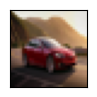

In [26]:
# Exibir a imagem
plt.figure(figsize = (1, 1))
plt.imshow(nova_imagem)
plt.xticks([])
plt.yticks([])
plt.show()

In [27]:
# converte a imagem para um array numpy e normaliza
nova_imagem_array = np.array(nova_imagem) / 255.0

In [28]:
# Expande a dimensão do array para que ele tenha o formato (1, 32, 32, 3)
nova_imagem_array = np.expand_dims(nova_imagem_array, axis = 0)

In [29]:
# Previsões
previsoes = modelo.predict(nova_imagem_array)

1/1 [==============================] - 0s 112ms/step


In [30]:
print(previsoes)

[[5.22880058e-04 9.84556079e-01 1.07691645e-04 5.78506661e-06
  7.33795957e-07 1.13639599e-05 9.86104642e-05 3.27237103e-06
  1.08834484e-03 1.36052454e-02]]


In [31]:
# Obtem a classe com maior probabilidade e o nome da classe
classe_previsao = np.argmax(previsoes)
nome_classe = nomes_classes[classe_previsao]

In [32]:
print('A  nova imagem foi classificada como: ', classe_previsao)
print('A nova imagem foi classificada como: ', nome_classe)

A  nova imagem foi classificada como:  1
A nova imagem foi classificada como:  automobile
